# Notebook 03 - Exploratory Data Analysis (EDA)

In this notebook, we will explore the cleaned dataset that we prepared earlier in Notebook 2 (02_Data_Loading_And_Preprocessing.ipynb). The dataset contains information about patients, including their age, gender, cognitive test scores, health status, and lifestyle habits.
Our goal is to understand how these different features relate to the diagnosis of Alzheimer’s disease. We will look at distributions, compare groups, and study relationships between variables to find out which features are most useful for predicting the risk of Alzheimer’s.

This step is important because it helps us decide which data to use in the machine learning model that we will build later in Notebook 4 (04_Model_Training_and_Evaluation). It also supports our overall project goal of using Business Intelligence and AI to help doctors identify people who might be at risk earlier.

In this notebook, we explore the cleaned dataset to discover patterns, trends, and relationships between features and the Alzheimer's diagnosis.
The goal is to understand which features might be useful for building a predictive model in the next step.

## Understanding Values in the Cleaned Dataset
The dataset we are working with has been cleaned and is now ready for analysis and modeling. All missing values have been handled, and the structure is complete. The features describe various aspects of each patient’s health, habits, and cognitive condition. Below is a breakdown of the columns grouped by category. This overview helps us understand what each variable represents and how it fits into the overall picture of Alzheimer’s risk. These categories guide us as we choose which features to analyze, scale, or model.

#### Demographics
- **PatientID** – Unique identifier for each patient (not used for prediction)  
- **Age** – Patient’s age, mostly between 60 and 90  
- **Gender** – 0 = Male, 1 = Female  
- **Ethnicity** – 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other  
- **EducationLevel** – 0 to 3, where higher numbers represent more education  

#### Lifestyle
- **Smoking** – 0 = No, 1 = Yes  
- **AlcoholConsumption** – Numeric value showing amount of alcohol consumed  
- **PhysicalActivity** – Activity level score  
- **DietQuality** – Diet health score  
- **SleepQuality** – Sleep health score  
- **BMI** – Body Mass Index  

#### Medical History
- **FamilyHistoryAlzheimers** – 0 = No, 1 = Yes (genetic link)  
- **CardiovascularDisease** – 0 = No, 1 = Yes  
- **Diabetes** – 0 = No, 1 = Yes  
- **Depression** – 0 = No, 1 = Yes  
- **HeadInjury** – 0 = No, 1 = Yes  
- **Hypertension** – 0 = No, 1 = Yes  

#### Clinical Values
- **SystolicBP** – Systolic blood pressure  
- **DiastolicBP** – Diastolic blood pressure  
- **CholesterolTotal** – Total cholesterol  
- **CholesterolLDL** – "Bad" cholesterol  
- **CholesterolHDL** – "Good" cholesterol  
- **CholesterolTriglycerides** – Another cholesterol type  

#### Cognitive and Functional Assessments
- **MMSE** – Mini-Mental State Exam score (0–30)  
- **FunctionalAssessment** – Measures daily function  
- **ADL** – Activities of Daily Living score  
- **MemoryComplaints** – 0 = No, 1 = Yes  
- **BehavioralProblems** – 0 = No, 1 = Yes  

#### Symptoms and Behavior
- **Confusion** – 0 = No, 1 = Yes  
- **Disorientation** – 0 = No, 1 = Yes  
- **PersonalityChanges** – 0 = No, 1 = Yes  
- **DifficultyCompletingTasks** – 0 = No, 1 = Yes  
- **Forgetfulness** – 0 = No, 1 = Yes  

#### Target
- **Diagnosis** – This is the target column: 0 = No Alzheimer’s, 1 = Alzheimer’s  

#### Removed Column
- **DoctorInCharge** – Removed due to containing anonymized text, not relevant for analysis  

---------------------------------

## Research Questions

In this notebook, we will look into some of the main research questions from our project, using data analysis to explore and better understand them:

**1. Can we predict the risk of Alzheimer's disease based on demographic and lifestyle factors such as age, gender, physical activity, and diet?**
- We will look for clear patterns that separate patients with Alzheimer’s from those without.
- We will check if features like age, MMSE score, or physical activity are linked to diagnosis outcomes.

**2. Which health and lifestyle features are most predictive of an Alzheimer’s diagnosis?**
- We will explore which features show strong differences between groups and are good candidates for use in a prediction model.

---------------------------

## Load Our Environment

We reuse the same setup from notebook 02. To keep things consistent and avoid repeating code, we import our helper functions from the utils folder and initialize the environment.

In [5]:
# Add the parent folder to the Python path so we can import files from the "utils" folder
import sys
sys.path.append("..")

# Import custom helper functions from our project
from utils.setup_notebook import (
    init_environment,
    load_csv,
    print_shape,
    print_info,
    print_full_info,
    print_description,
    print_categorical_description,
    show_head
)
from utils.save_tools import save_plot, save_notebook_and_summary

# Import commonly used libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Run environment setup
init_environment()
print("All libraries imported and environment initialized.")

Environment setup complete.
All libraries imported and environment initialized.


-------------------------

## Load Dataset

In [9]:
df = pd.read_csv("../data/alzheimers_clean.csv")
print("Cleaned dataset loaded. Shape:", df.shape)

Cleaned dataset loaded. Shape: (2149, 33)


--------------------

## Distribution of the Target Variable: Diagnosis

We begin by examining the distribution of our target variable, Diagnosis, where:
- 0 = No Alzheimer's
- 1 = Alzheimer's

This helps us check whether the dataset is balanced or skewed, which can affect modeling accuracy.


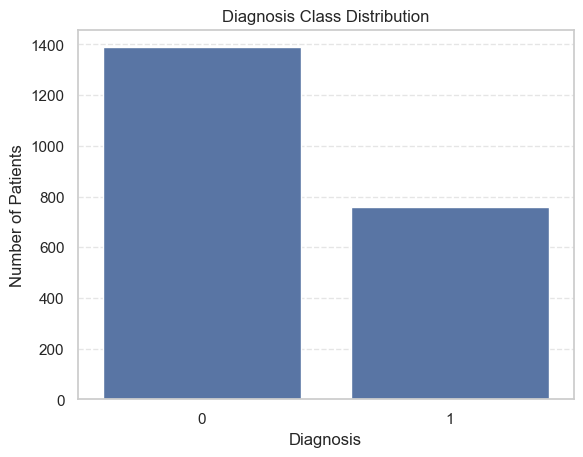

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [17]:
#Diagnosis countplot
sns.countplot(data=df, x="Diagnosis")
plt.title("Diagnosis Class Distribution")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Patients")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Display raw counts
df["Diagnosis"].value_counts()

### Binary Features by Diagnosis

In this section, we look at how binary variables (e.g., symptoms and conditions) differ between patients with and without an Alzheimer’s diagnosis. We calculate the percentage of patients with value = 1 for each binary feature within each diagnosis group.


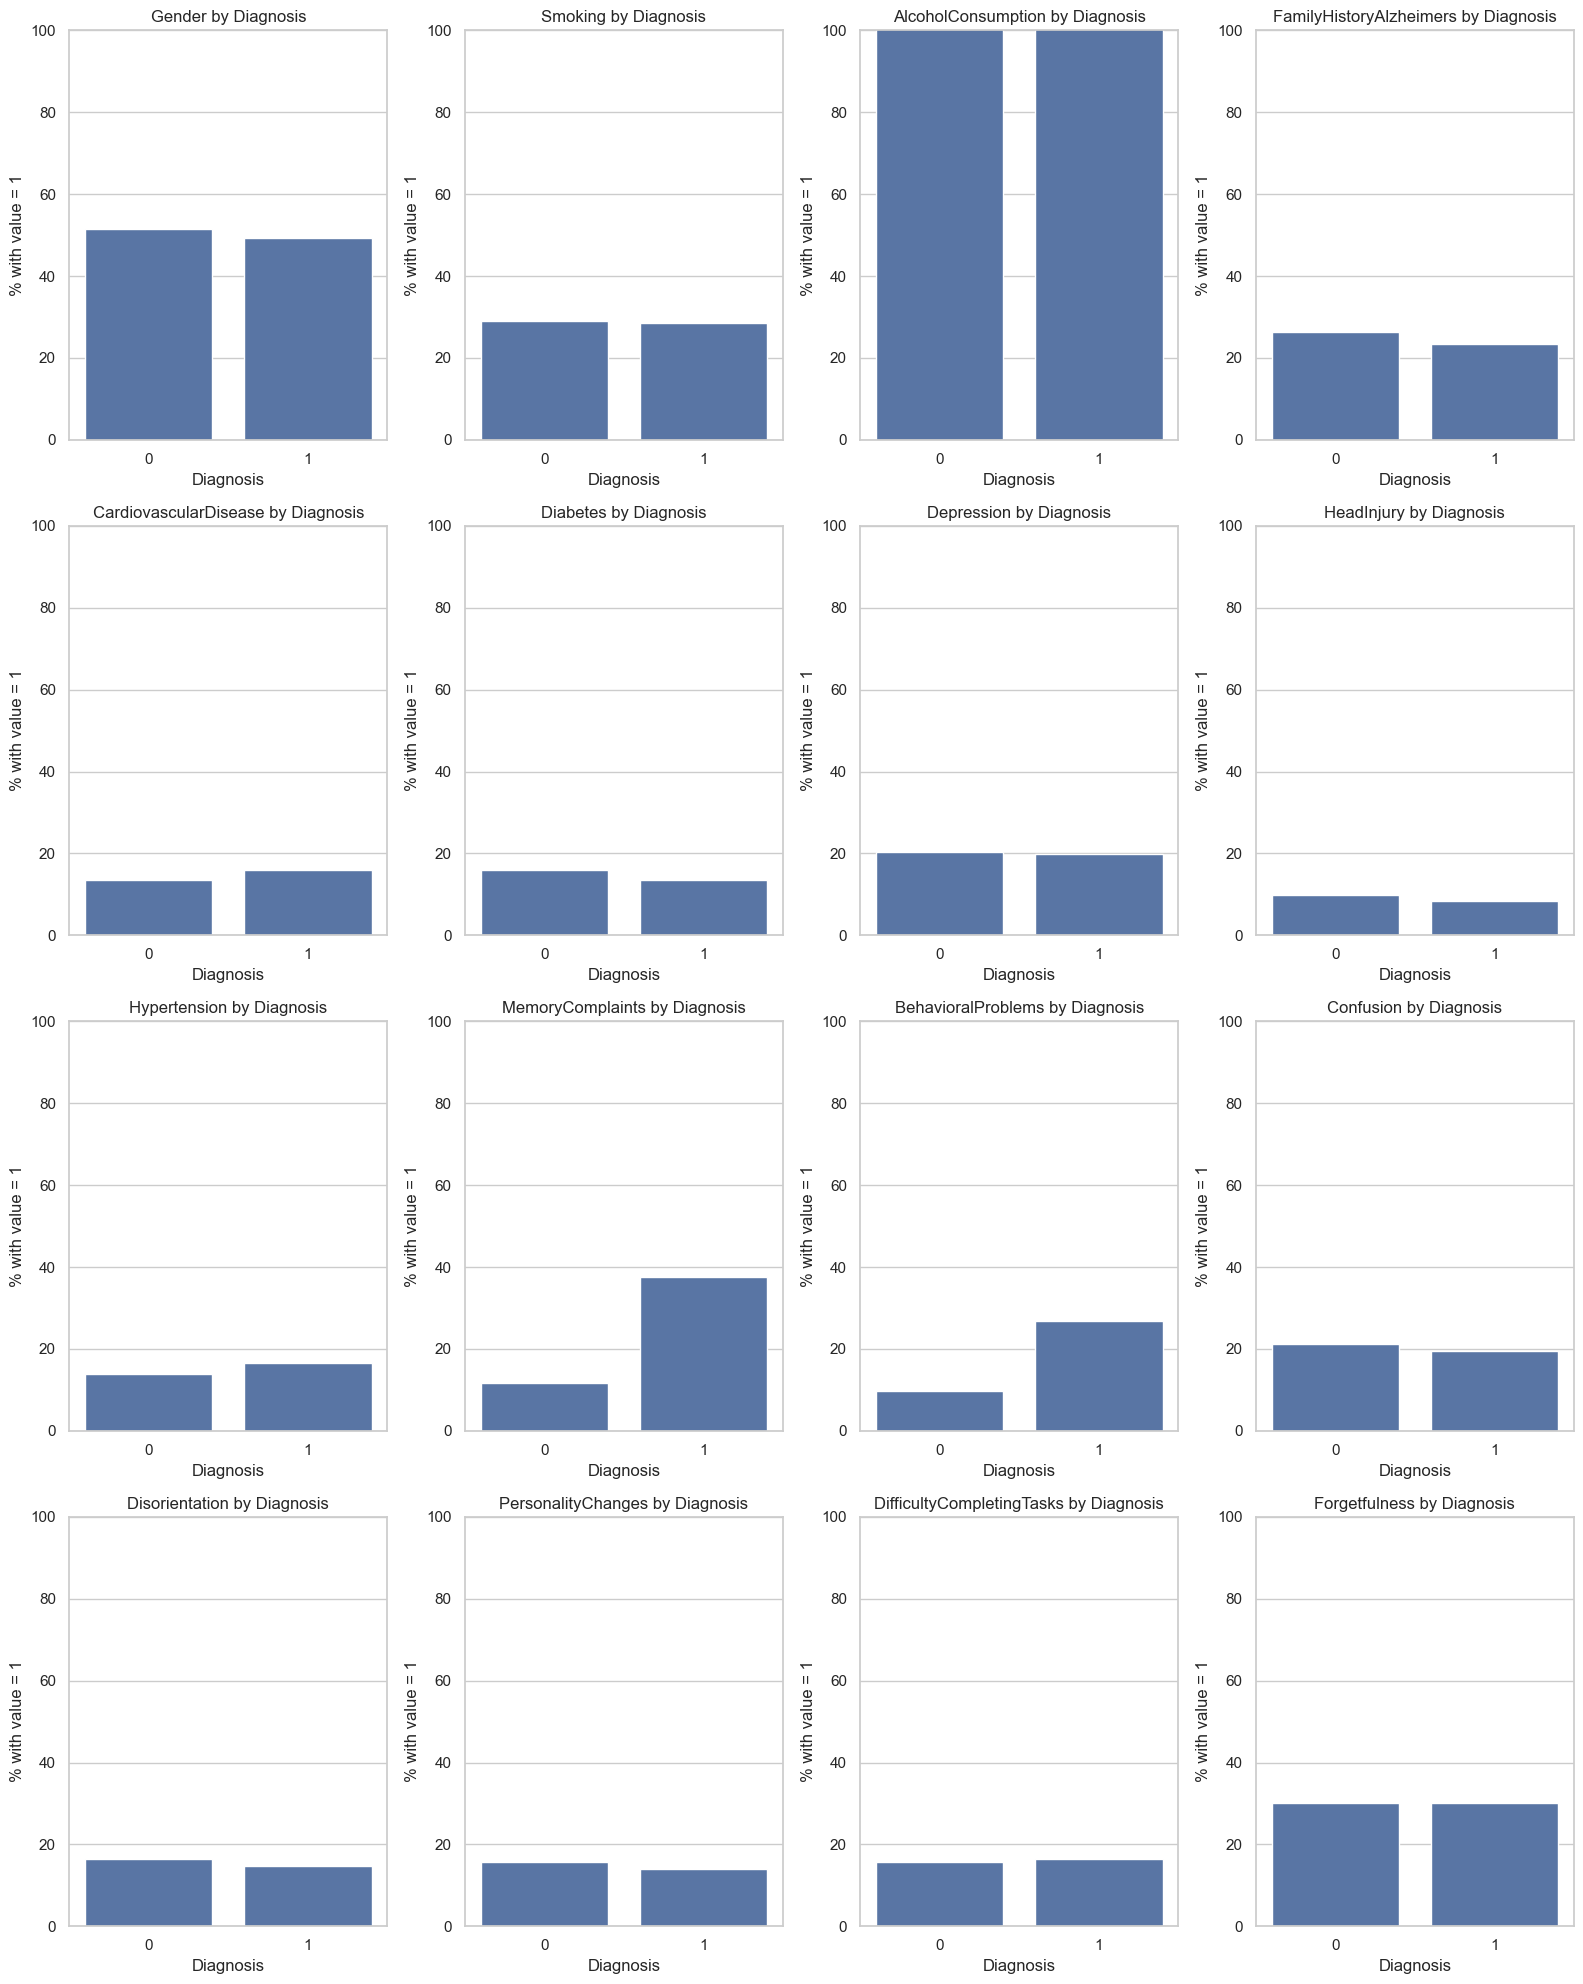

In [20]:
binary_features = [
    "Gender", "Smoking", "AlcoholConsumption", "FamilyHistoryAlzheimers",
    "CardiovascularDisease", "Diabetes", "Depression", "HeadInjury",
    "Hypertension", "MemoryComplaints", "BehavioralProblems",
    "Confusion", "Disorientation", "PersonalityChanges",
    "DifficultyCompletingTasks", "Forgetfulness"
]

# Plot percentage of positive cases (value=1) by Diagnosis
plt.figure(figsize=(16, 20))
for idx, feature in enumerate(binary_features):
    plt.subplot(4, 4, idx + 1)
    values = df.groupby("Diagnosis")[feature].mean() * 100
    sns.barplot(x=values.index, y=values.values)
    plt.title(f"{feature} by Diagnosis")
    plt.ylabel("% with value = 1")
    plt.xlabel("Diagnosis")
    plt.ylim(0, 100)

plt.tight_layout()
plt.show()

------------------------

## Explore Continuous Feature Distributions

### Histograms of continuous features
Here we look at the overall distribution of each continuous feature. This helps us understand value ranges, skewness, and detect any outliers.
Continuous variables include clinical and cognitive scores such as Age, BMI, MMSE, and blood pressure values.

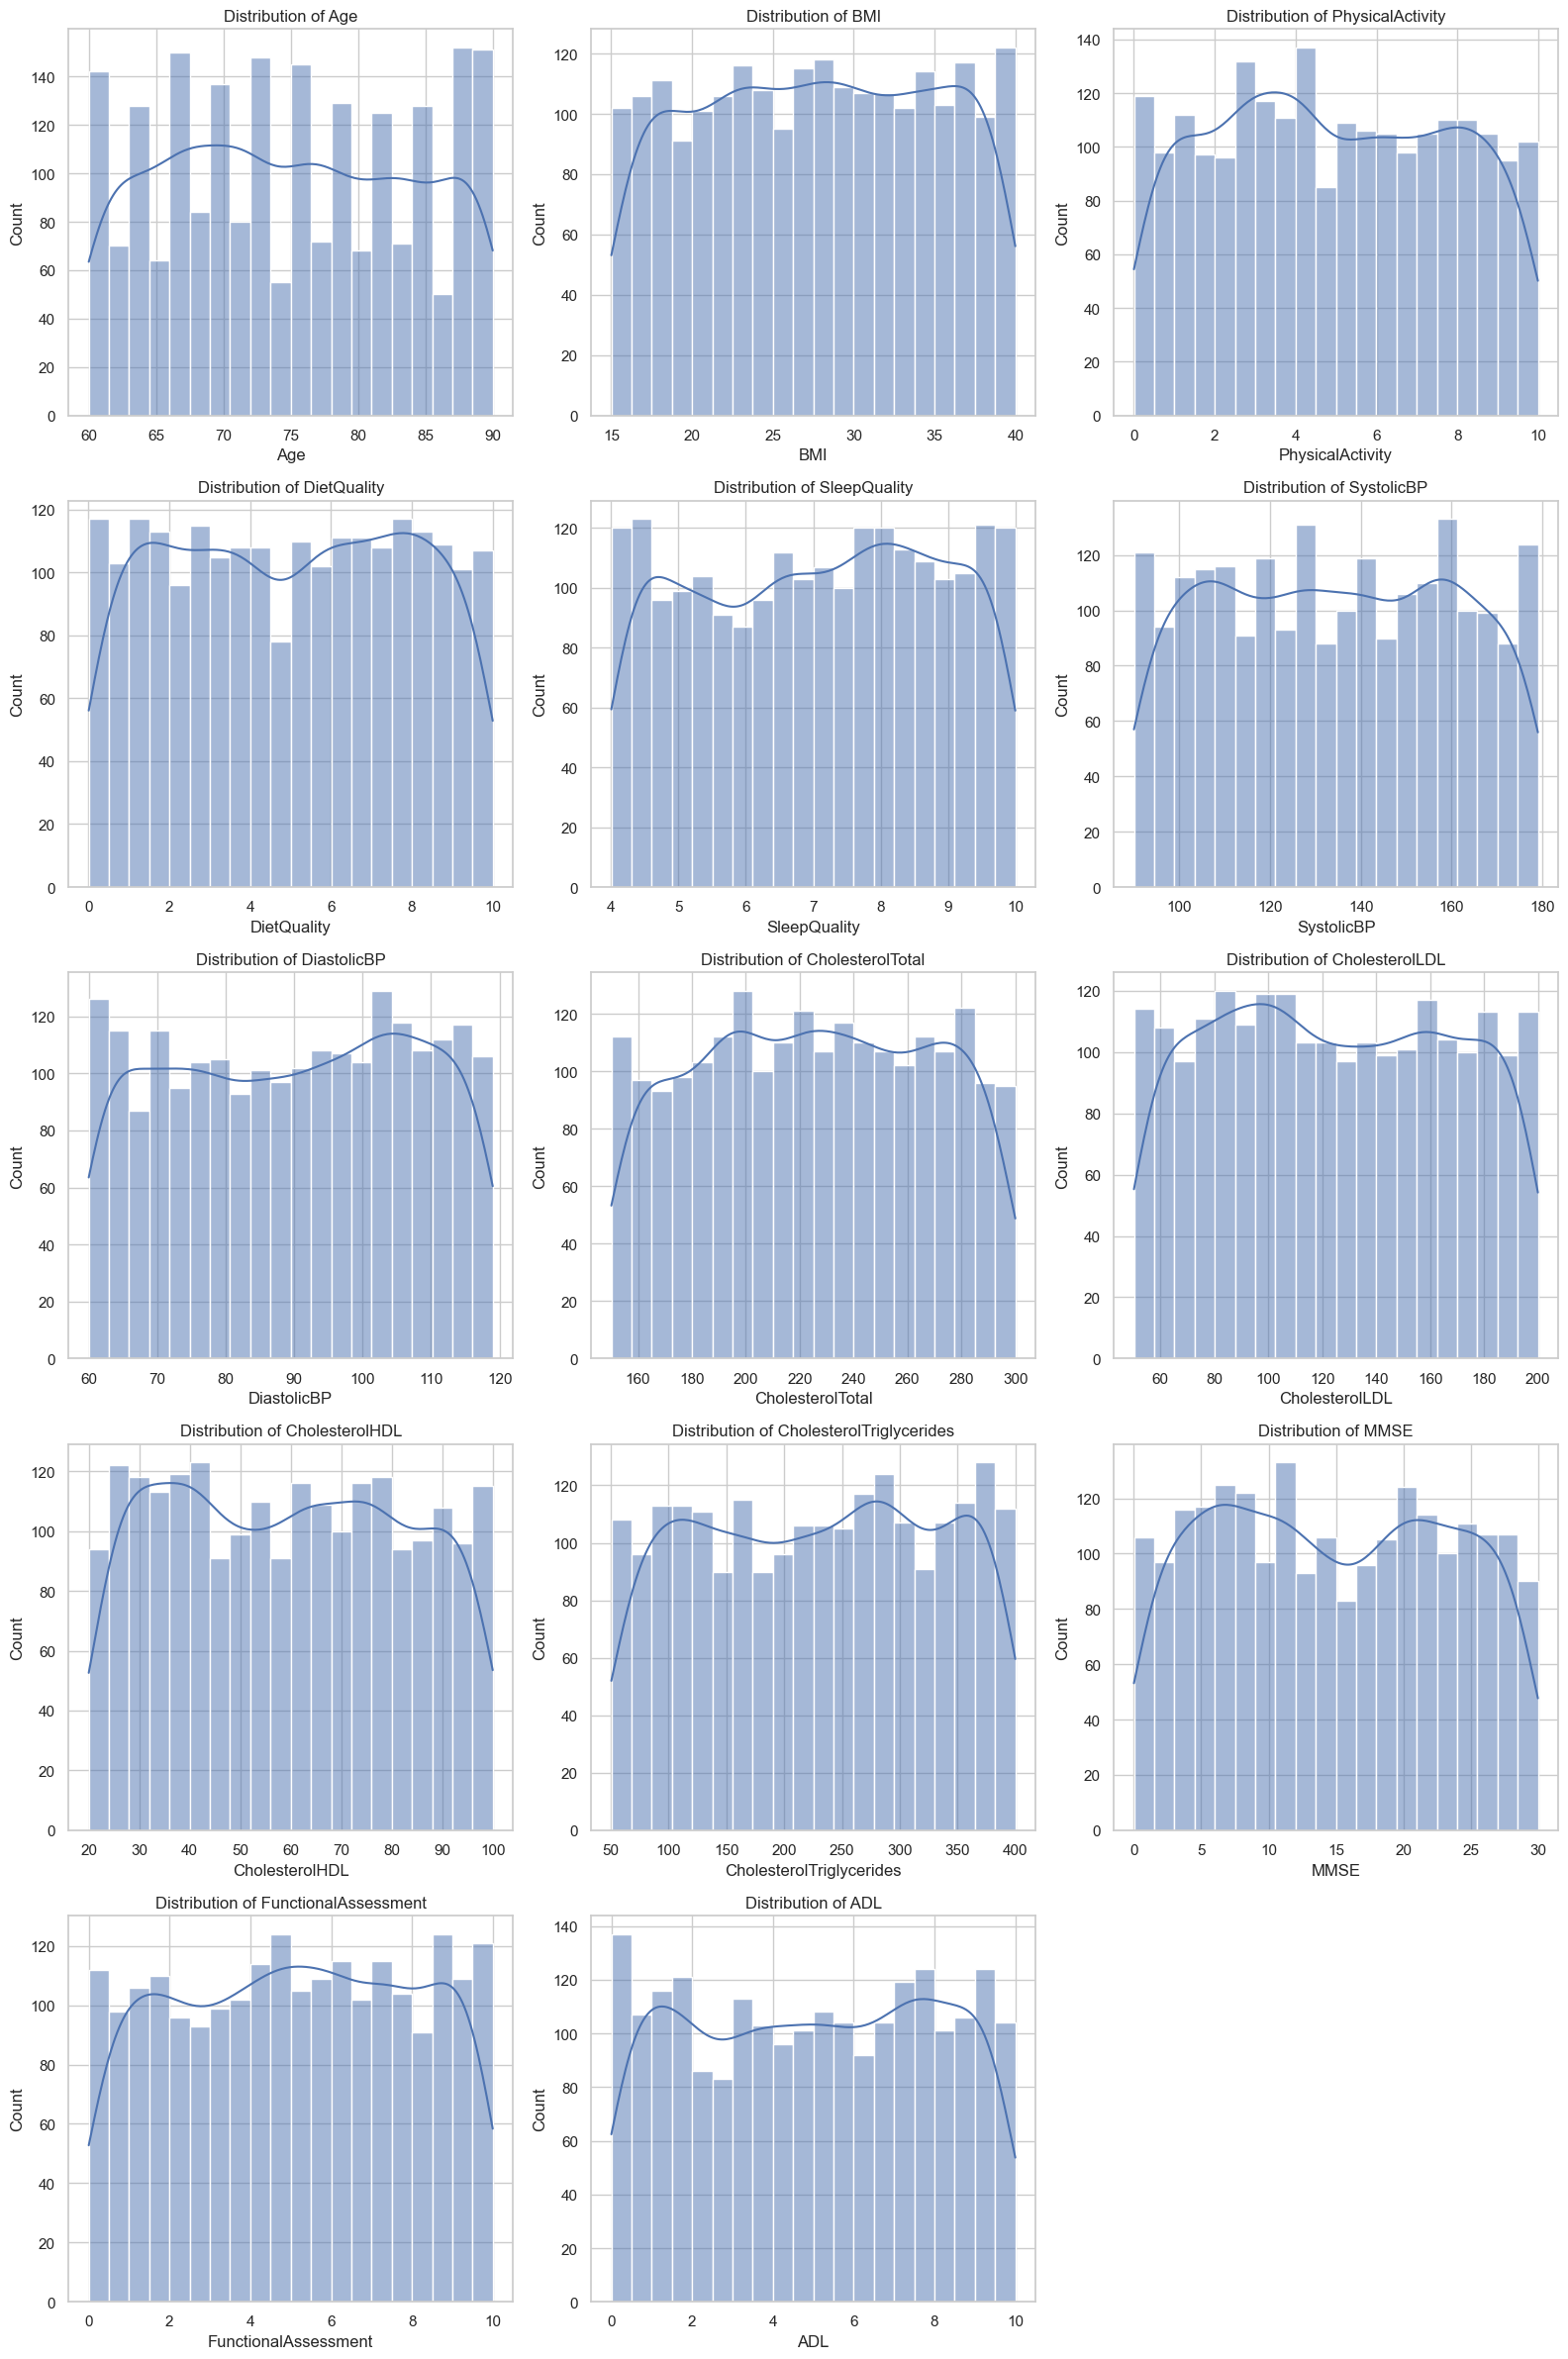

In [48]:
continuous_features = [
    "Age", "BMI", "PhysicalActivity", "DietQuality", "SleepQuality",
    "SystolicBP", "DiastolicBP", "CholesterolTotal", "CholesterolLDL",
    "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
    "FunctionalAssessment", "ADL"
]

# Plot histograms
plt.figure(figsize=(16, 24))
for idx, feature in enumerate(continuous_features):
    plt.subplot(5, 3, idx + 1)
    sns.histplot(data=df, x=feature, kde=True, bins=20)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Boxplots by diagnosis
We now compare each continuous feature across the two diagnosis groups using boxplots.  
This allows us to see if there are noticeable differences in distributions, medians, or outliers between patients with and without Alzheimer's. These insights help identify which features might be useful for prediction.

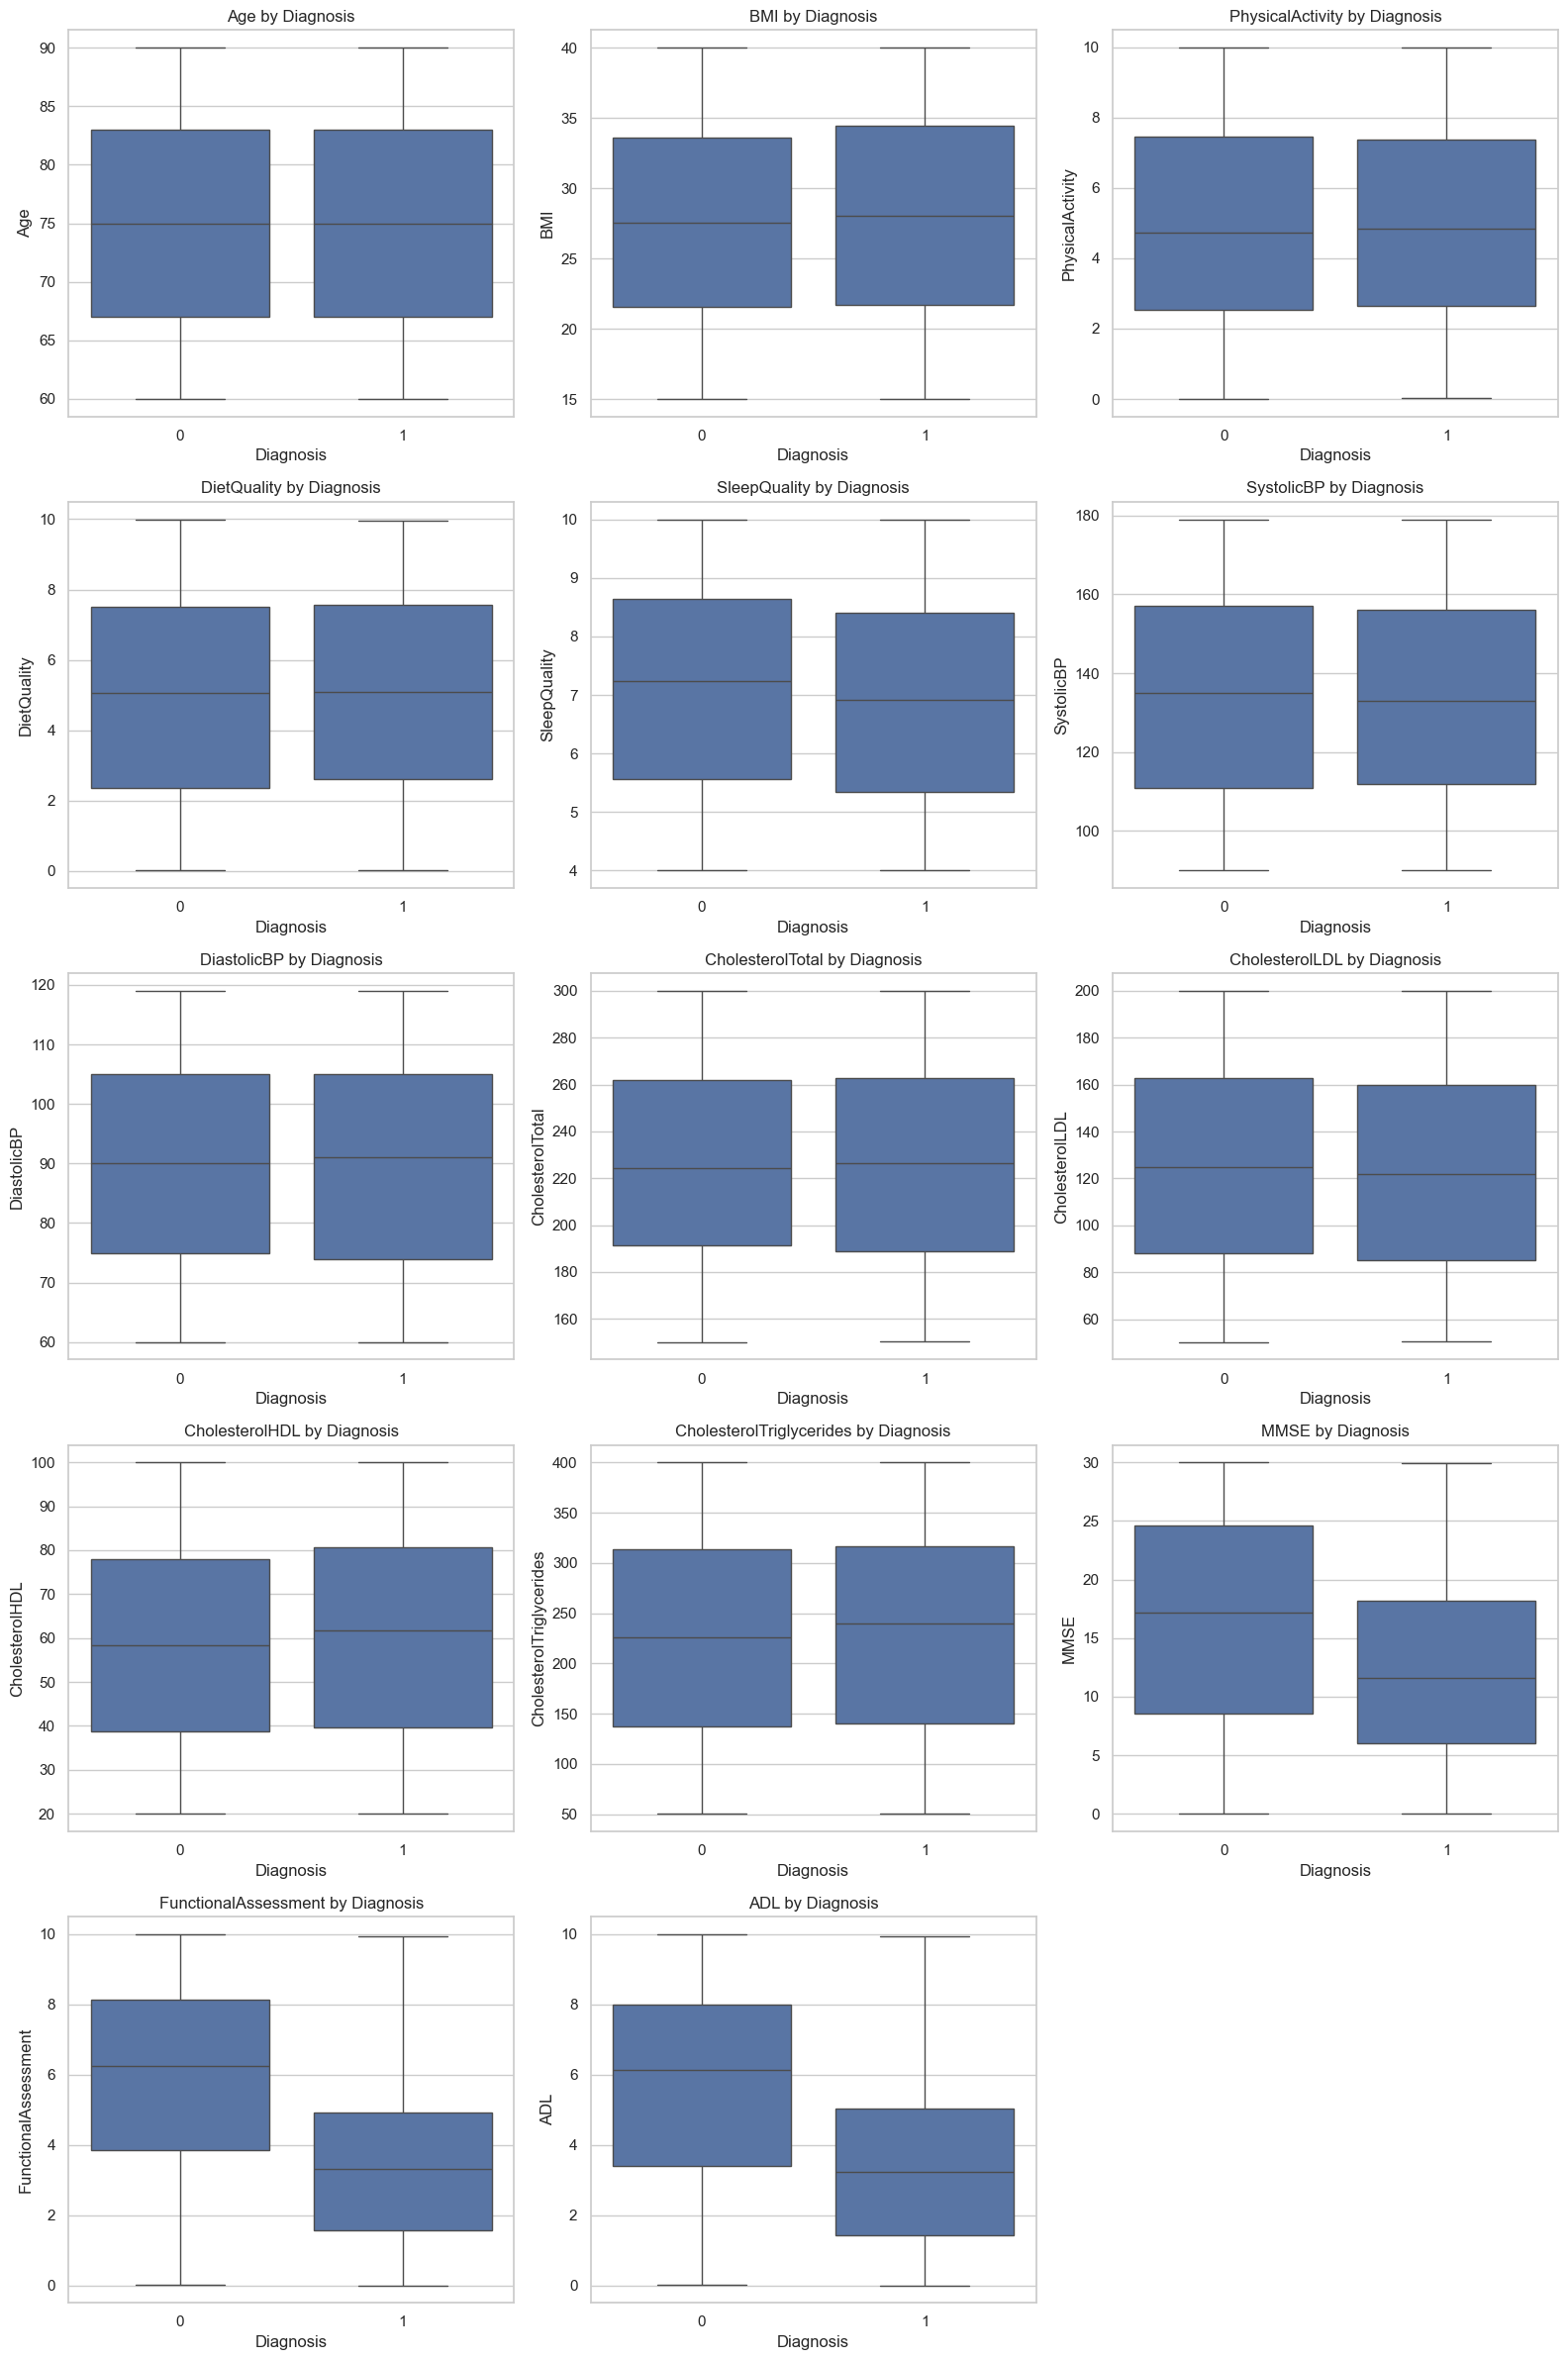

In [51]:
plt.figure(figsize=(16, 24))
for idx, feature in enumerate(continuous_features):
    plt.subplot(5, 3, idx + 1)
    sns.boxplot(data=df, x="Diagnosis", y=feature)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


--------------

### Correlation Matrix

The correlation matrix shows how numerical features are linearly related to one another. This helps identify patterns, clusters of similar variables, or redundant information.
We use a correlation matrix to check for strong linear relationships between features and to detect multicollinearity, which can affect model performance.

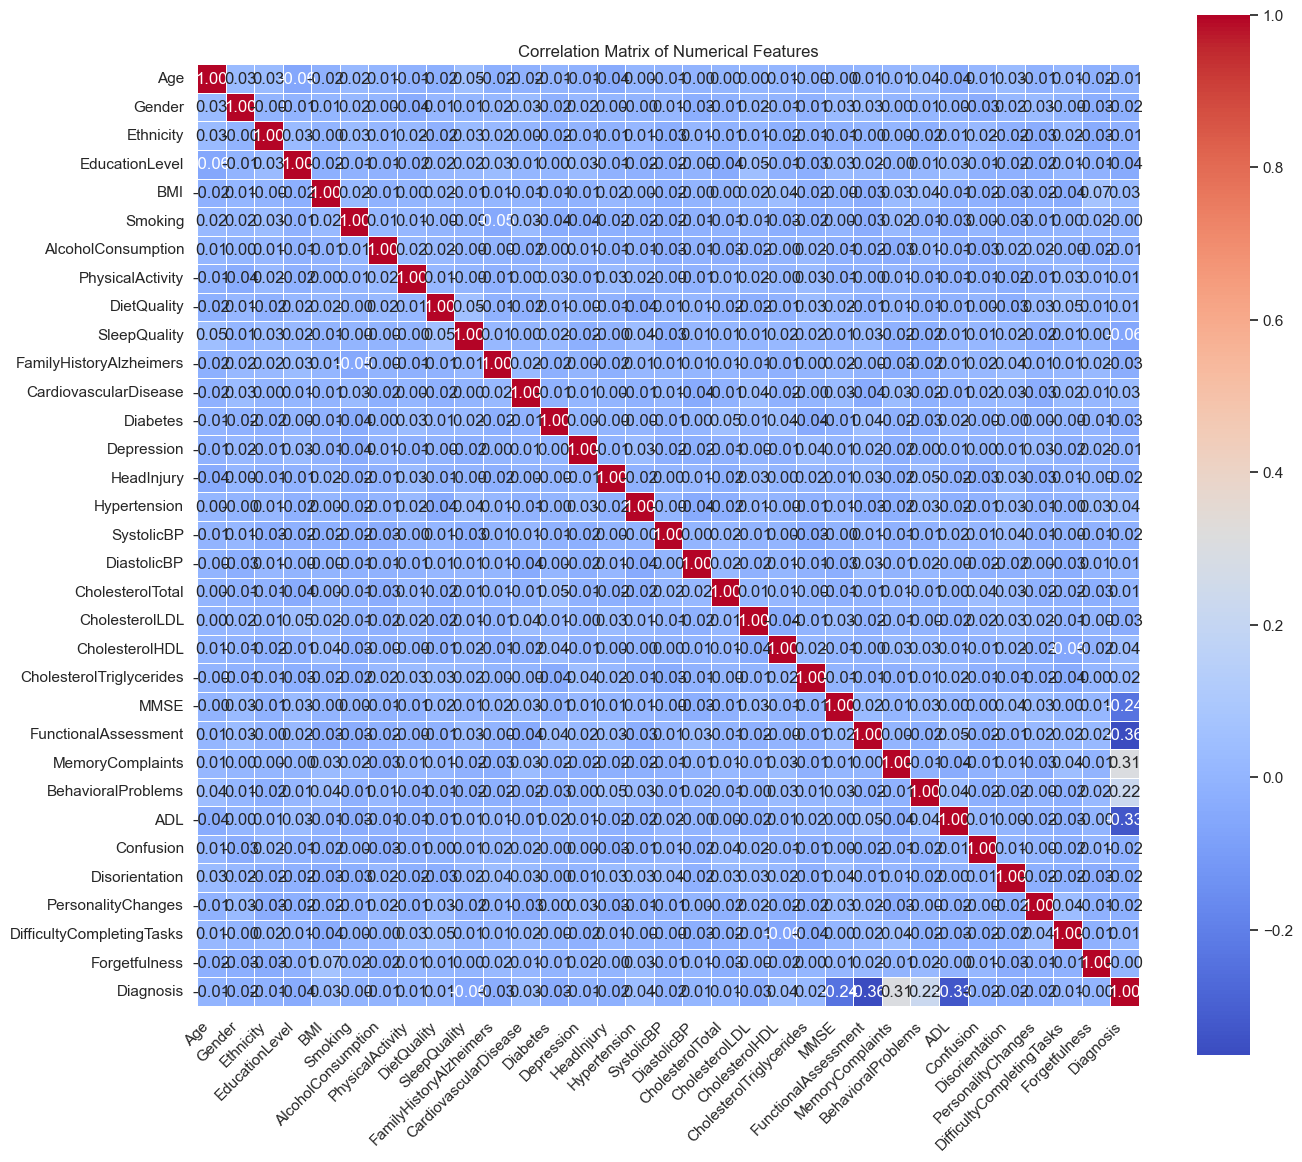

In [28]:
# Calculate correlation matrix (only for numerical columns)
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Correlation Observations
From the correlation matrix, we can make several observations:

MMSE, FunctionalAssessment, and ADL show strong negative correlations with the Diagnosis variable. This suggests that lower scores on these cognitive and functional assessments are associated with a higher likelihood of Alzheimer's.

Disorientation, Forgetfulness, and Confusion show positive correlations with Diagnosis. These features appear more often among patients who are diagnosed.

Other clinical variables like cholesterol levels and blood pressure show weaker correlations, indicating they may have less predictive power on their own.

These patterns help identify which features may be most valuable for modeling.


In [ ]:
## Key Predictive Features by Diagnosis

We now focus on three features that showed strong relationships with the target variable Diagnosis in the earlier correlation analysis: MMSE, FunctionalAssessment, and ADL. These are clinical and cognitive assessments often used to evaluate Alzheimer’s-related symptoms.

Boxplots below show how these scores vary across the two diagnosis classes.

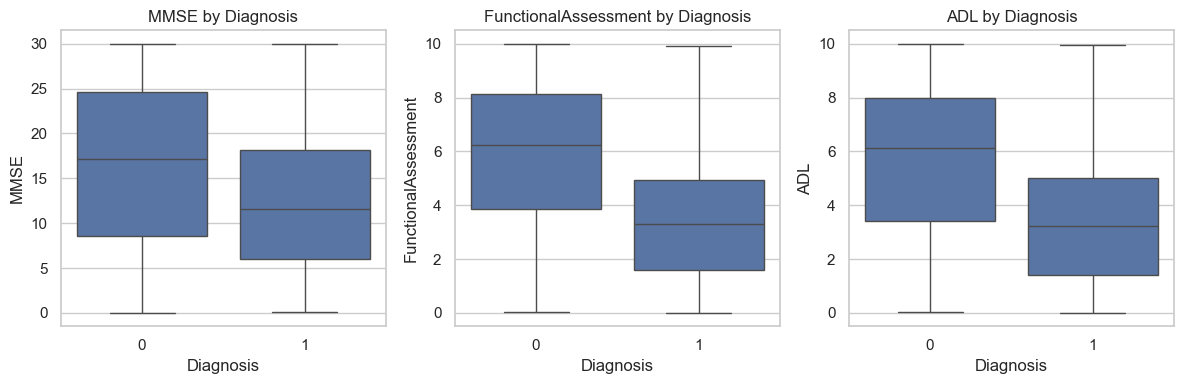

In [64]:
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

plt.figure(figsize=(12, 4))
for idx, feature in enumerate(key_features):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(data=df, x="Diagnosis", y=feature)
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


### Observations
MMSE scores are clearly lower in the diagnosed group, showing strong separation between classes.

FunctionalAssessment and ADL also drop significantly for Alzheimer’s patients.

These patterns confirm that these features are highly relevant for modeling and likely to improve predictive performance.

## Visual Comparison of Top Predictive Features

/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/800350732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Diagnosis", y=feature, inner="box", palette="pastel")
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/800350732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Diagnosis", y=feature, inner="box", palette="pastel")
/var/folders/ct/0p5jxxp54xlcjs_q4dwkbdd80000gn/T/ipykernel_3134/800350732.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Diagnosis", y=fe

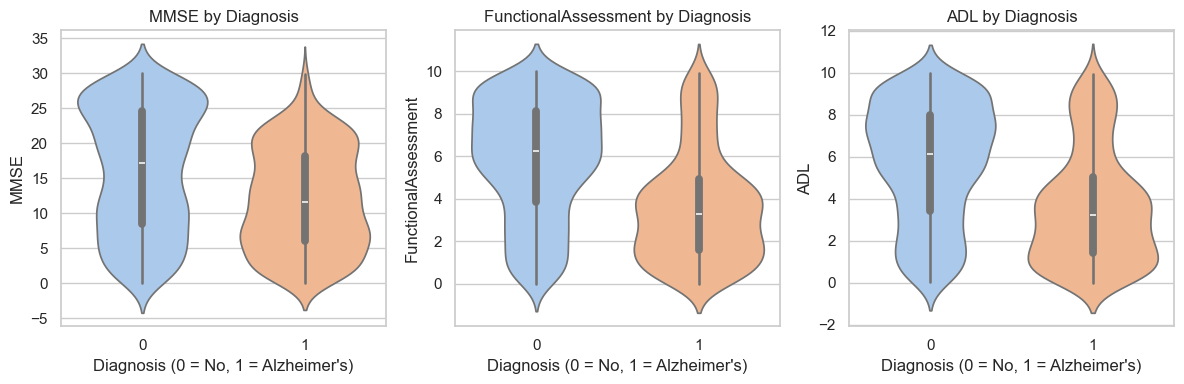

In [32]:
key_features = ["MMSE", "FunctionalAssessment", "ADL"]

plt.figure(figsize=(12, 4))
for idx, feature in enumerate(key_features):
    plt.subplot(1, 3, idx + 1)
    sns.violinplot(data=df, x="Diagnosis", y=feature, inner="box", palette="pastel")
    plt.title(f"{feature} by Diagnosis")
    plt.xlabel("Diagnosis (0 = No, 1 = Alzheimer's)")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

This plot shows how the scores for MMSE, FunctionalAssessment, and ADL differ between patients with and without Alzheimer's.

Key observations:

MMSE scores are significantly lower for patients diagnosed with Alzheimer's. The difference in distribution is clear and supports its role as a primary indicator.

FunctionalAssessment and ADL scores also show distinct patterns, with diagnosed individuals generally scoring lower. This suggests greater difficulty in daily activities and functional independence.

These features are strong candidates for modeling due to their clear separation between classes.

## Notebook Summary

------------------------